<a href="https://colab.research.google.com/github/saikiranmuthuluri/Sentiment-analysis-on-food-reviews-using-NLP/blob/main/NLP_Sentiment_analysis_of_Food_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
# Installing required libraries
import nltk
import pandas as pd
import re  # re- regular expression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# downloading NLTK data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Loading dataset
df = pd.read_csv("/content/food_Reviews.csv")

In [5]:
# checking the first few rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# checking the last few rows
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
98048,98049,B002GC3EJY,A1HJZDEM68LQVI,Tomas G. Edvardsson,6.0,6.0,5.0,1.273104e+09,Duck fat. A new dimension to cooking,You MUST have duck fat at home. Period.<br />T...
98049,98050,B002GC3EJY,ADY0HCXVQU07K,kitchen stuff,3.0,3.0,5.0,1.307923e+09,Just Better than butter,Duck Fat has a unique ability to put an underl...
98050,98051,B002GC3EJY,A2D63X7IRSEZ5C,James Craig,3.0,3.0,5.0,1.277683e+09,Great fast service,The product was packed professionally and was ...
98051,98052,B002GC3EJY,A3R7DWU0ZVDJ3L,"Jeffery Durand ""Jeff""",2.0,2.0,5.0,1.325117e+09,The most delicious thanks giving ever,Any decent cook knows that it takes good ingre...
98052,98053,B002GC3EJY,A3ENICFOYIFHIF,li,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Data preprocessing
# Initializing the lemmatizer

lemmatizer = WordNetLemmatizer()

In [8]:
# Preprocessing function
def preprocess_text(text):
    # removing the special characters ,numbers and punctuation
    text = re.sub(r'[^a-zA-Z\s]',  '', text,re.I)
    text = text.lower()
    # Tokenizing the text
    words = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Joining words back into string
    return ' '.join(words)
    # Applying  preprocessing to review text column
    df['cleaned_review'] = df['reviewText'].apply(preprocess_text)
    # Checking the cleaned reviews
    df[['reviewText', 'cleaned_review']].head()

In [9]:
# Saving cleaned dataset to new CSV file
df.to_csv("cleaned_amazon_food_reviews.csv", index=False)
print("Cleaned data has been saved to 'cleaned_amazon_food_reviews.csv'")

Cleaned data has been saved to 'cleaned_amazon_food_reviews.csv'


In [10]:
# Loading the new CSV file to check the data
cleaned_df = pd.read_csv("cleaned_amazon_food_reviews.csv")

In [11]:
# Displaying the first few rows
print(cleaned_df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality cann

In [12]:
# Display the last few rows
print(cleaned_df.tail())

          Id   ProductId          UserId            ProfileName  \
98048  98049  B002GC3EJY  A1HJZDEM68LQVI    Tomas G. Edvardsson   
98049  98050  B002GC3EJY   ADY0HCXVQU07K          kitchen stuff   
98050  98051  B002GC3EJY  A2D63X7IRSEZ5C            James Craig   
98051  98052  B002GC3EJY  A3R7DWU0ZVDJ3L  Jeffery Durand "Jeff"   
98052  98053  B002GC3EJY  A3ENICFOYIFHIF                     li   

       HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
98048                   6.0                     6.0    5.0  1.273104e+09   
98049                   3.0                     3.0    5.0  1.307923e+09   
98050                   3.0                     3.0    5.0  1.277683e+09   
98051                   2.0                     2.0    5.0  1.325117e+09   
98052                   NaN                     NaN    NaN           NaN   

                                     Summary  \
98048   Duck fat. A new dimension to cooking   
98049                Just Better than butter

**Sentiment** **Labelling** :

The goal here is to assign sentiment labels (e.g., Positive, Negative, Neutral) to the reviews.

Since we have the "overall" rating column (assuming it contains ratings from 1 to 5), we can use it to determine sentiment:

**Positive**: Ratings of 4 and 5

**Neutral**: Rating of 3

**Negative**: Ratings of 1 and 2

In [13]:
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [14]:
# Function to label sentiment based on rating
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'
# Applying function to create a new column 'sentiment'
df['sentiment'] = df['Score'].apply(label_sentiment)
# Checking the results
print(df[['Score', 'sentiment']].head())
# Count the number of reviews per sentiment
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())


   Score sentiment
0    5.0  Positive
1    1.0  Negative
2    4.0  Positive
3    2.0  Negative
4    5.0  Positive

Sentiment Distribution:
sentiment
Positive    75466
Negative    14640
Neutral      7947
Name: count, dtype: int64


In [15]:
# Cleaning column names
df.columns = df.columns.str.strip()
# Printing column names again to verify
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'sentiment'],
      dtype='object')


<ipython-input-16-f221355231e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


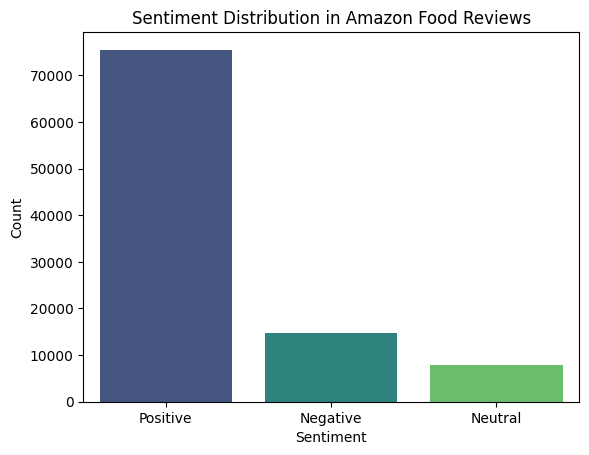

In [16]:
# Visualizing Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns
# Ploting sentiment distribution
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution in Amazon Food Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Model Building**

**Prepare the data:**

**'Text'** column as input (features).

**'sentiment'** column as output (target variable).

**Vectorizing the text:**

Convert the cleaned reviews ('Text') into numerical features using:

CountVectorizer or TF-IDF Vectorizer.

**Spliting the data:**

Split into training and testing sets.

**Training a model:**

Logistic Regression model as a baseline.

**Evaluating the model:**

Assess accuracy, precision, recall, and F1-score.

In [17]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Extracting features and targets

In [18]:
# Defining features (Text) and target (sentiment)
X = df['Text']  # Input: Raw text column
y = df['sentiment']  # Target: Sentiment labels

Text Vectorization Using **TF-IDF**

In [24]:
# Handle missing values by replacing NaN with an empty string
X = df['Text'].fillna("")
# Convert text data into numerical vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

Splitting data into training and testing sets

In [23]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Training a logic Regression

In [25]:
# Initializing and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Making predictions

In [26]:
# Predicting sentiment on the test set
y_pred = model.predict(X_test)

In [27]:
# Evaluating the model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.8499821528733874

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.62      0.67      2885
     Neutral       0.48      0.15      0.23      1592
    Positive       0.88      0.97      0.92     15134

    accuracy                           0.85     19611
   macro avg       0.69      0.58      0.61     19611
weighted avg       0.82      0.85      0.83     19611


Confusion Matrix:
 [[ 1783   127   975]
 [  319   238  1035]
 [  354   132 14648]]


Evaluation

Model Accuracy: 0.8499821528733874

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.62      0.67      2885
     Neutral       0.48      0.15      0.23      1592
    Positive       0.88      0.97      0.92     15134

    accuracy                           0.85     19611
   macro avg       0.69      0.58      0.61     19611
weighted avg       0.82      0.85      0.83     19611


Confusion Matrix:
 [[ 1783   127   975]
 [  319   238  1035]
 [  354   132 14648]]


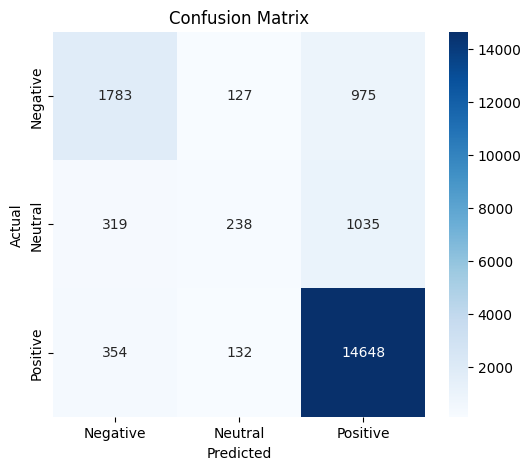

In [31]:
# Importing required libraries for visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Naive Bayes (MultinomialNB)**: Suitable for text classification problems.


In [29]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
# Initializing and training Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
# Predicting and evaluaing Naive Bayes
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8060272296160318

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    Negative       0.83      0.26      0.39      2885
     Neutral       0.34      0.01      0.01      1592
    Positive       0.81      0.99      0.89     15134

    accuracy                           0.81     19611
   macro avg       0.66      0.42      0.43     19611
weighted avg       0.77      0.81      0.75     19611



In [35]:
!pip install wordcloud

Word Cloud for Positive Sentiments

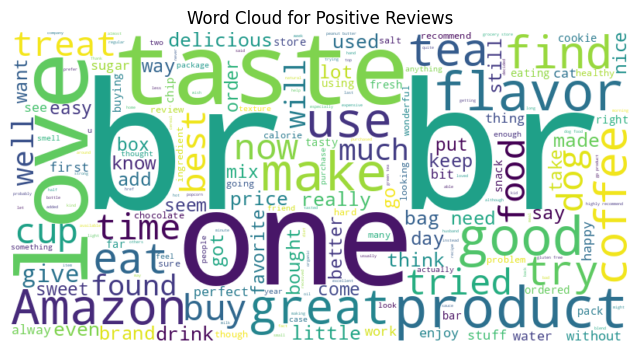

In [41]:
from wordcloud import WordCloud
# Clean the 'Text' column: Replace NaN with empty strings and ensure all values are strings
df['Text'] = df['Text'].fillna('').astype(str)
# Generate word cloud for Positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'Positive']['Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
# Plot Positive Word Cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Word Cloud for Positive Reviews")
plt.axis("off")
plt.show()

Word Cloud for Negative Sentiments

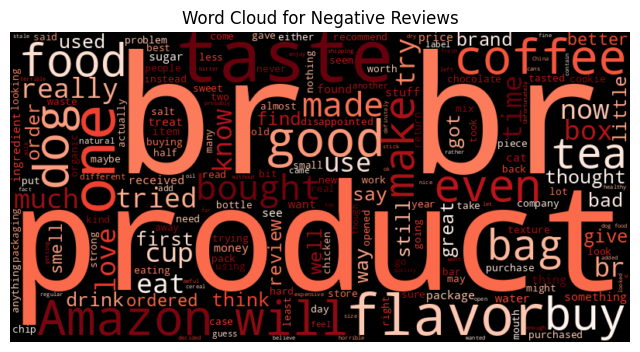

In [42]:
# Generate word cloud for Negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 'Negative']['Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)
# Plot Negative Word Cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Word Cloud for Negative Reviews")
plt.axis("off")
plt.show()

<ipython-input-43-06bcba6779a6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='magma')


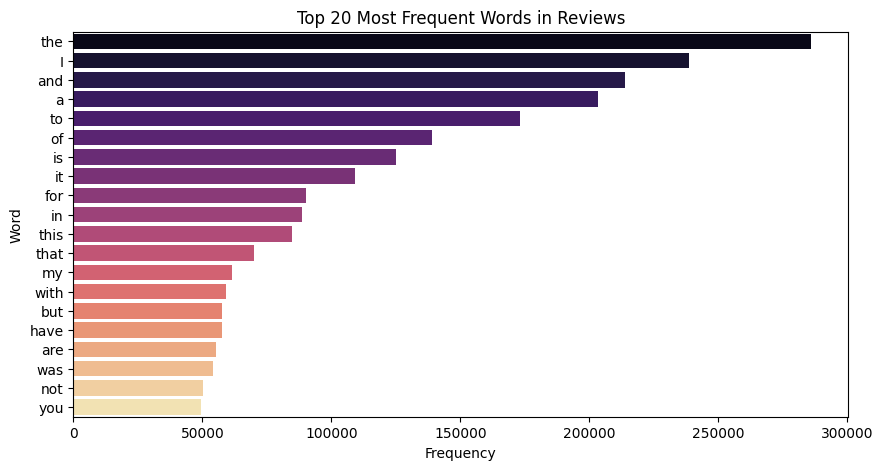

In [43]:
from collections import Counter
# Tokenizing all words from the 'Text' column
all_words = ' '.join(df['Text']).split()
# Count the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
# Creating a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
# Plot the top 20 words
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='magma')
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()


<ipython-input-44-ac8161374d41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='coolwarm')


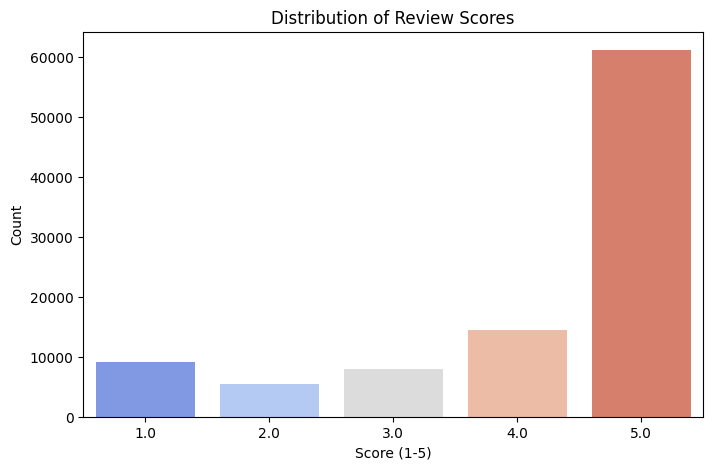

In [44]:
# Ploting the distribution of review scores
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=df, palette='coolwarm')
plt.title("Distribution of Review Scores")
plt.xlabel("Score (1-5)")
plt.ylabel("Count")
plt.show()

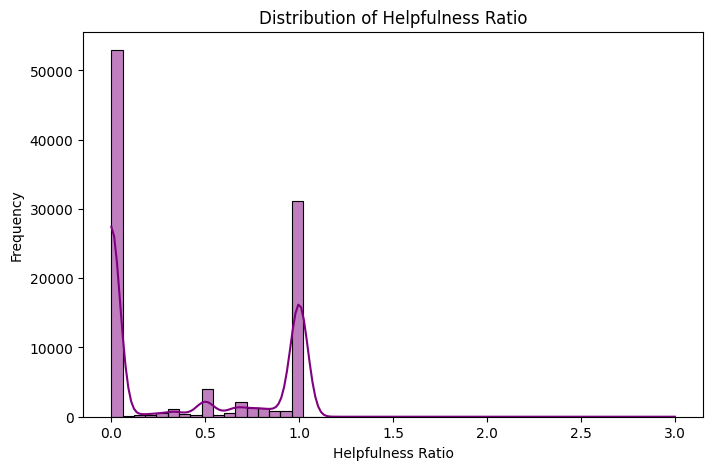

In [45]:
# Calculating helpfulness ratio
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['HelpfulnessRatio'] = df['HelpfulnessRatio'].fillna(0)  # Replace NaN with 0
# Plot helpfulness ratio distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['HelpfulnessRatio'], bins=50, kde=True, color='purple')
plt.title("Distribution of Helpfulness Ratio")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Frequency")
plt.show()


<ipython-input-46-6a03be1f461f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score', y='sentiment', data=df, palette='Set2')


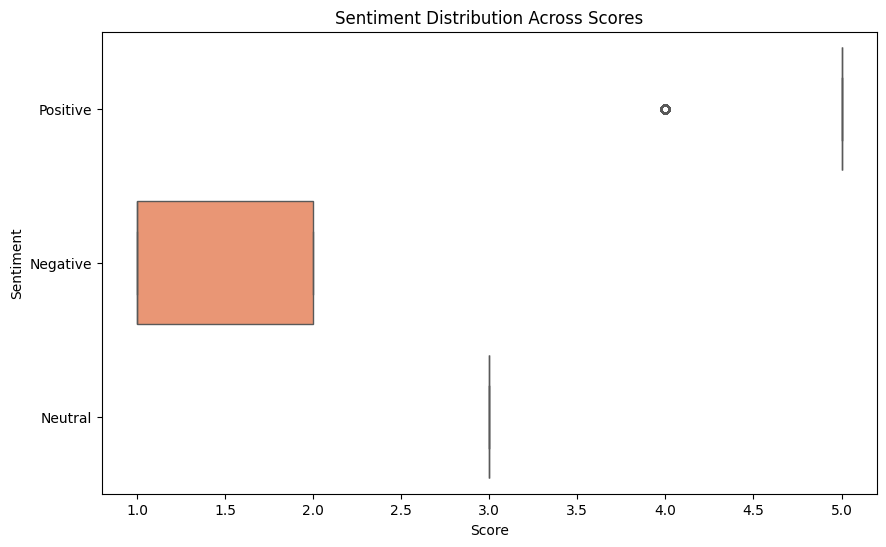

In [46]:
# Sentiment vs Score
# Plot sentiment distribution based on scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution Across Scores")
plt.xlabel("Score")
plt.ylabel("Sentiment")
plt.show()

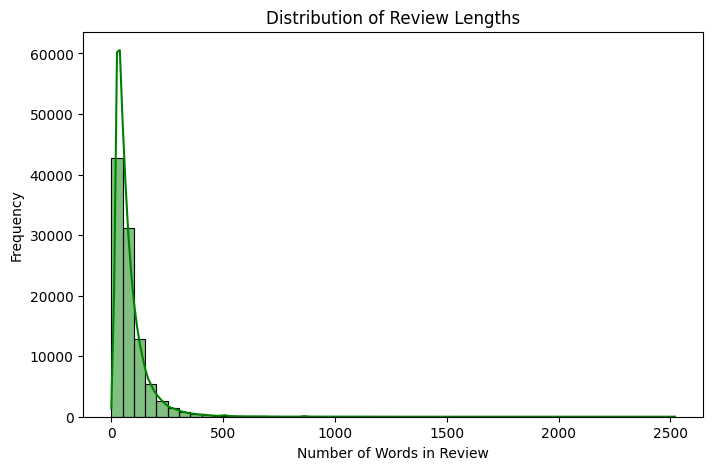

In [47]:
# Calculating the length of each review
df['ReviewLength'] = df['Text'].apply(lambda x: len(str(x).split()))
# Plot the distribution of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['ReviewLength'], bins=50, kde=True, color='green')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()


<ipython-input-48-cf2bef71edd6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='plasma')


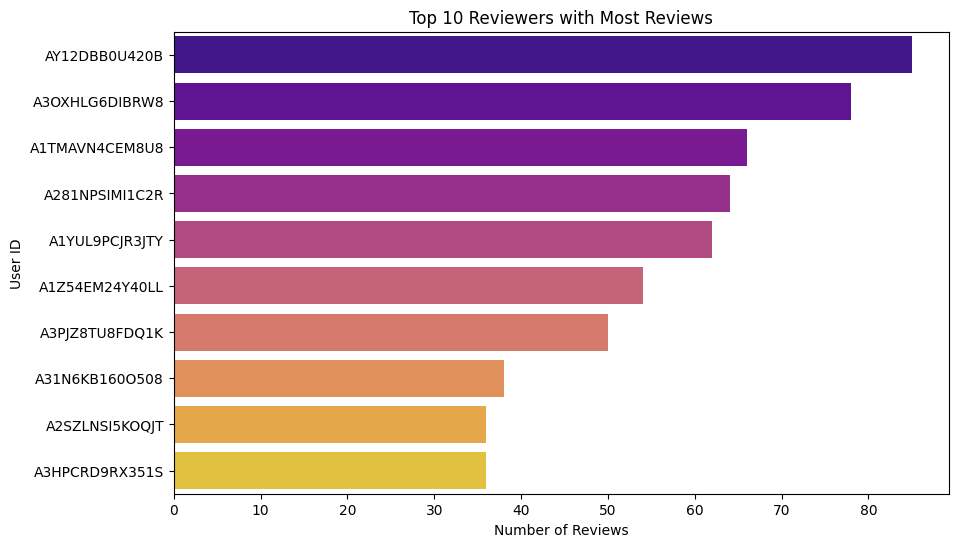

In [48]:
# Top 10 reviewers by review count
top_reviewers = df['UserId'].value_counts().head(10)
# Plot top reviewers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='plasma')
plt.title("Top 10 Reviewers with Most Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("User ID")
plt.show()


In [50]:
# Time based review analysis
# Inspecting basic statistics for the 'Time' column
print(df['Time'].describe())
# Check for non-numeric or null values
print("Null values:", df['Time'].isnull().sum())
print("Non-numeric values:", df['Time'].apply(lambda x: not isinstance(x, (int, float))).sum())
# Check for abnormally large values
print("Max Time value:", df['Time'].max())

count    9.805200e+04
mean     1.296347e+09
std      4.772034e+07
min      9.486720e+08
25%      1.270771e+09
50%      1.311725e+09
75%      1.332806e+09
max      1.351210e+09
Name: Time, dtype: float64
Null values: 1
Non-numeric values: 0
Max Time value: 1351209600.0


In [51]:
# Removing rows with null or invalid 'Time' values
df = df[pd.to_numeric(df['Time'], errors='coerce').notnull()]
# Replace extremely large or small values outside a reasonable range
df = df[(df['Time'] > 0) & (df['Time'] < 2**31)]  # Unix timestamp valid range

In [52]:
# Converting 'Time' column to datetime format
df['ReviewDate'] = pd.to_datetime(df['Time'], unit='s')
# Verify the conversion
print(df['ReviewDate'].head())

0   2011-04-27
1   2012-09-07
2   2008-08-18
3   2011-06-13
4   2012-10-21
Name: ReviewDate, dtype: datetime64[ns]


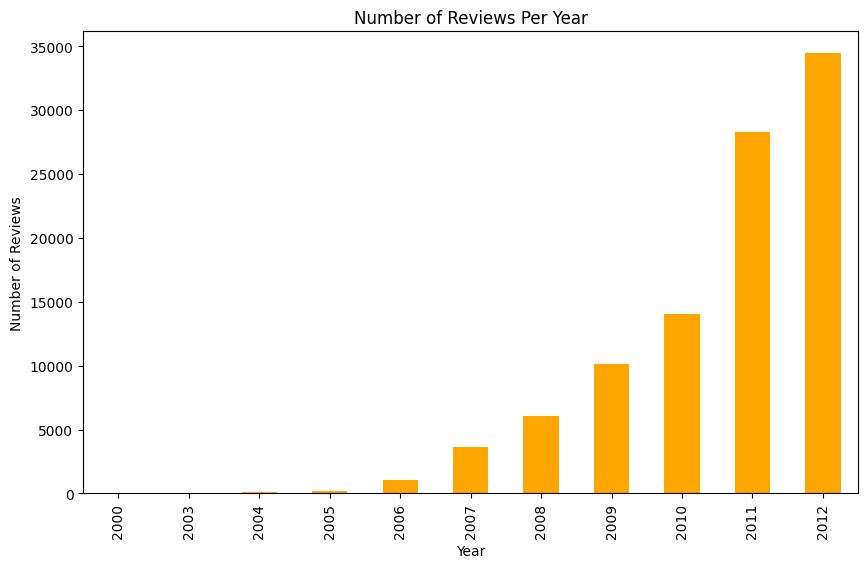

In [53]:
# Grouping by year and counting the number of reviews
reviews_per_year = df['ReviewDate'].dt.year.value_counts().sort_index()
# Plot reviews per year
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='bar', color='orange')
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


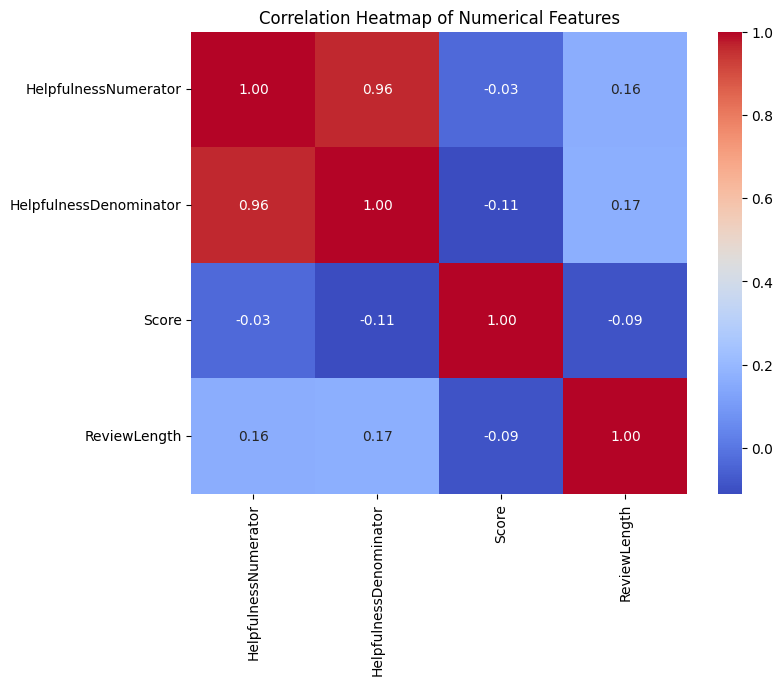

In [55]:
# Corelation heat map for numerical features
# Select numerical columns
numerical_columns = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'ReviewLength']
# Plot a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

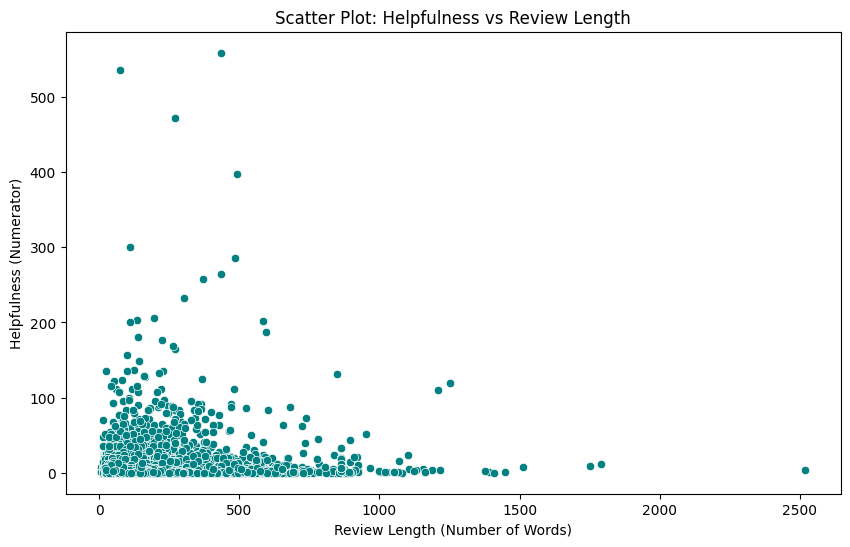

In [56]:
# Scatter plot for Helpfulness vs Review Length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ReviewLength', y='HelpfulnessNumerator', data=df, color='teal')
plt.title("Scatter Plot: Helpfulness vs Review Length")
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Helpfulness (Numerator)")
plt.show()

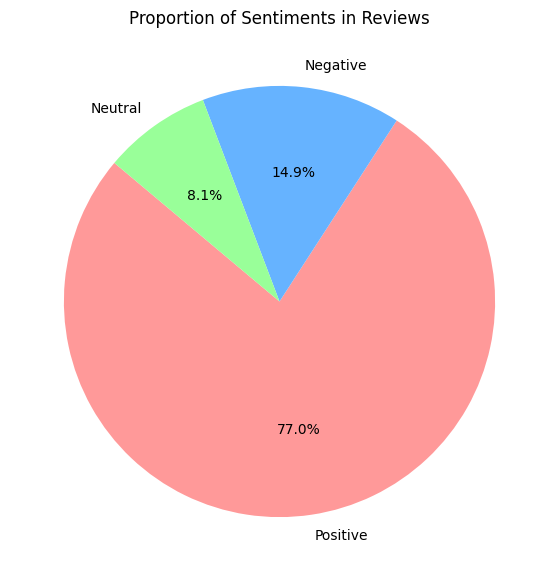

In [57]:
# Pie chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Proportion of Sentiments in Reviews")
plt.show()


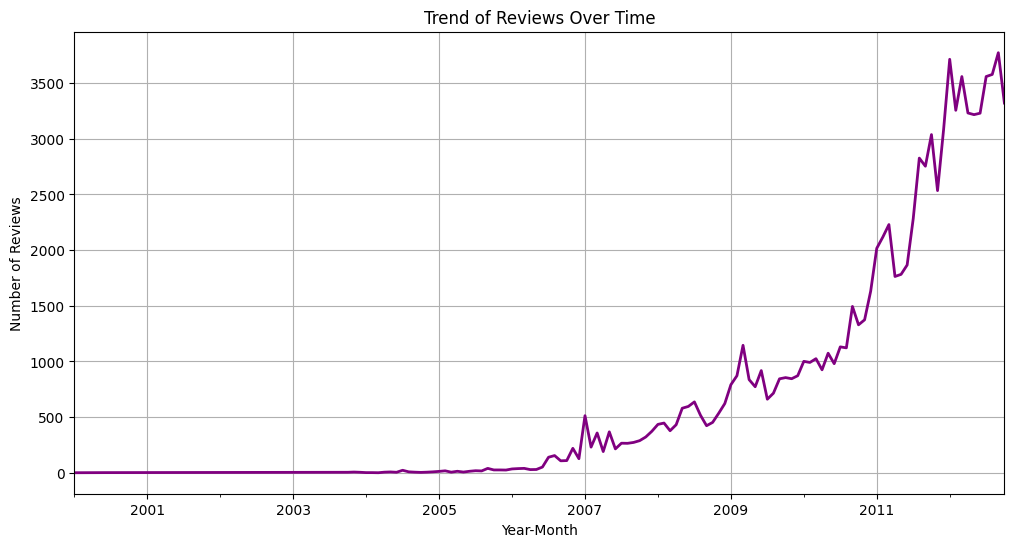

In [58]:
# Reviews trend over time
reviews_per_month = df['ReviewDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line', color='purple', linewidth=2)
plt.title("Trend of Reviews Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()


<ipython-input-59-077cc336acb3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


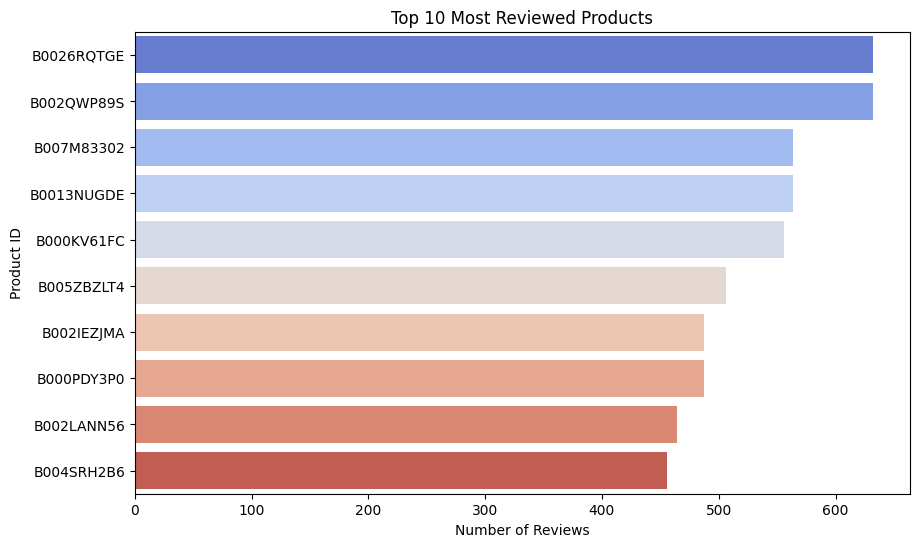

In [59]:
# Top 10 most reviewed products
top_products = df['ProductId'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product ID")
plt.show()
